<h1 align='center'>
<p style='color:yellow'>
<b>
DETECT CREDIT FRAUD BY USING SVM MODEL
</b>
</p>
</h1>

Churn rate (Tỷ lệ hủy) là marketing metric mô tả lượng khách hàng rời khỏi doanh nghiệp trong một khoảng thời gian cụ thể. Mỗi user được chỉ định một prediction value ước tính our churn rate tại bất kỳ thời điểm nào. Giá trị này dựa trên: Thông tin nhân khẩu học của user dụa theo Hành vi duyệt web, tức dữ liệu mua hàng trong quá khứ cùng các thông tin khác. 

Nó đưa vào các dự đoán độc quyền và riêng biệt về thời gian người dùng user sẽ là customer. This score $(\in [1, 5])$ được cập nhật hàng ngày cho tất cả người dùng có ít nhất một lần chuyển đổi.

## 1. Load dataset

In [41]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [42]:
df = pd.read_csv('credit_fraud.csv', index_col=0)
df.head(3)

,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,29,59,3,0
1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,4,52,8,0
2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0


## 2. Data Analysis

In [43]:
df.shape

(25134, 19)

In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,25134.0,5.078838e+06,41941.018788,5008806.0,5042228.25,5079004.0,5115603.75,5150487.0
NO_OF_CHILD,25134.0,5.123339e-01,0.787785,0.0,0.00,0.0,1.00,19.0
INCOME,25134.0,1.948339e+05,104510.987243,27000.0,135000.00,180000.0,225000.00,1575000.0
FLAG_MOBIL,25134.0,1.000000e+00,0.000000,1.0,1.00,1.0,1.00,1.0
WORK_PHONE,25134.0,2.738124e-01,0.445923,0.0,0.00,0.0,1.00,1.0
PHONE,25134.0,2.927906e-01,0.455052,0.0,0.00,0.0,1.00,1.0
E_MAIL,25134.0,1.006605e-01,0.300885,0.0,0.00,0.0,0.00,1.0
FAMILY SIZE,25134.0,2.294064e+00,0.947590,1.0,2.00,2.0,3.00,20.0
BEGIN_MONTH,25134.0,2.612059e+01,16.439658,0.0,12.00,24.0,39.00,60.0
AGE,25134.0,4.053617e+01,9.559474,21.0,33.00,40.0,48.00,67.0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25134 entries, 0 to 25133
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              25134 non-null  int64  
 1   GENDER          25134 non-null  object 
 2   CAR             25134 non-null  object 
 3   REALITY         25134 non-null  object 
 4   NO_OF_CHILD     25134 non-null  int64  
 5   INCOME          25134 non-null  float64
 6   INCOME_TYPE     25134 non-null  object 
 7   EDUCATION_TYPE  25134 non-null  object 
 8   FAMILY_TYPE     25134 non-null  object 
 9   HOUSE_TYPE      25134 non-null  object 
 10  FLAG_MOBIL      25134 non-null  int64  
 11  WORK_PHONE      25134 non-null  int64  
 12  PHONE           25134 non-null  int64  
 13  E_MAIL          25134 non-null  int64  
 14  FAMILY SIZE     25134 non-null  float64
 15  BEGIN_MONTH     25134 non-null  int64  
 16  AGE             25134 non-null  int64  
 17  YEARS_EMPLOYED  25134 non-null  int6

Our dataset has both categorical and numerical data. 

However, we can some features, include: `'NO_OF_CHILD'`, `'FLAG_MOBIL'`, `'WORK_PHONE'`, `'PHONE'` and `'E_MAIL'` and `'TARGET'` have `dtype=int64` completely inappropriate, so to avoid errors in the calculation process later, we will convert them to categorical data.

But, we split `'TARGET'` to invidual columns, which becomed 'ground-truth label' to check the result of our prediction.

In [46]:
change = ['NO_OF_CHILD', 'FLAG_MOBIL', 'WORK_PHONE', 'PHONE', 'E_MAIL', 'TARGET']
for col in change:
    df[col] = df[col].astype('object')

Classify data in categorical and numerical data.

In [47]:
categorical_df = df.select_dtypes(exclude=['number']).drop(columns='TARGET')
categorical_col = list(categorical_df.columns)

numerical_df = df.select_dtypes(include=['number'])
numerical_col = list(numerical_df.columns)

print(f'Categorical columns: {categorical_col}')
print(f'Numerical columns: {numerical_col}')

Categorical columns: ['GENDER', 'CAR', 'REALITY', 'NO_OF_CHILD', 'INCOME_TYPE', 'EDUCATION_TYPE', 'FAMILY_TYPE', 'HOUSE_TYPE', 'FLAG_MOBIL', 'WORK_PHONE', 'PHONE', 'E_MAIL']
Numerical columns: ['ID', 'INCOME', 'FAMILY SIZE', 'BEGIN_MONTH', 'AGE', 'YEARS_EMPLOYED']


<br>

We check the value of `'TARGET'` columns:

In [48]:
df['TARGET'].value_counts()

TARGET
0    24712
1      422
Name: count, dtype: int64

### Data Cleaning

In [49]:
df.isna().sum()

ID                0
GENDER            0
CAR               0
REALITY           0
NO_OF_CHILD       0
INCOME            0
INCOME_TYPE       0
EDUCATION_TYPE    0
FAMILY_TYPE       0
HOUSE_TYPE        0
FLAG_MOBIL        0
WORK_PHONE        0
PHONE             0
E_MAIL            0
FAMILY SIZE       0
BEGIN_MONTH       0
AGE               0
YEARS_EMPLOYED    0
TARGET            0
dtype: int64

In [50]:
df.duplicated().sum()

0

### Visualize data

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')

#### Categorical data

In [52]:
# def plots(df:pd.DataFrame, x, y, axes, i):
    
#     sns.countplot(data=df, x=x, hue=y, ax=axes)
#     axes.tick_params(axis=str(x), labelrotation=-30)
    
#     group = df.groupby(y)
    
#     axes[i][1].pie(
#         df[y].value_counts(),
#         labels=df[y].value_counts().index,
#         colors=['blue', 'orange'],
#         shadow=True,
#         explode=[0, 0.05],
#         autopct='%1.1f%%'
#     )

In [53]:
# def plot_group(df, x, y):
    
#     fig, axes = plt.subplots(nrows=len(y), ncols=4, figsize=(20, 20))
    
#     for i in range(len(y)):
#         plots(df, x, y[i], axes, i)
    
#     plt.suptitle(f'Plot of {x} grouped by target', size=20)
    
#     plt.tight_layout()
#     plt.show()

In [54]:
# for i in range(df.columns):
#     plots(df, i, categorical_df.columns)

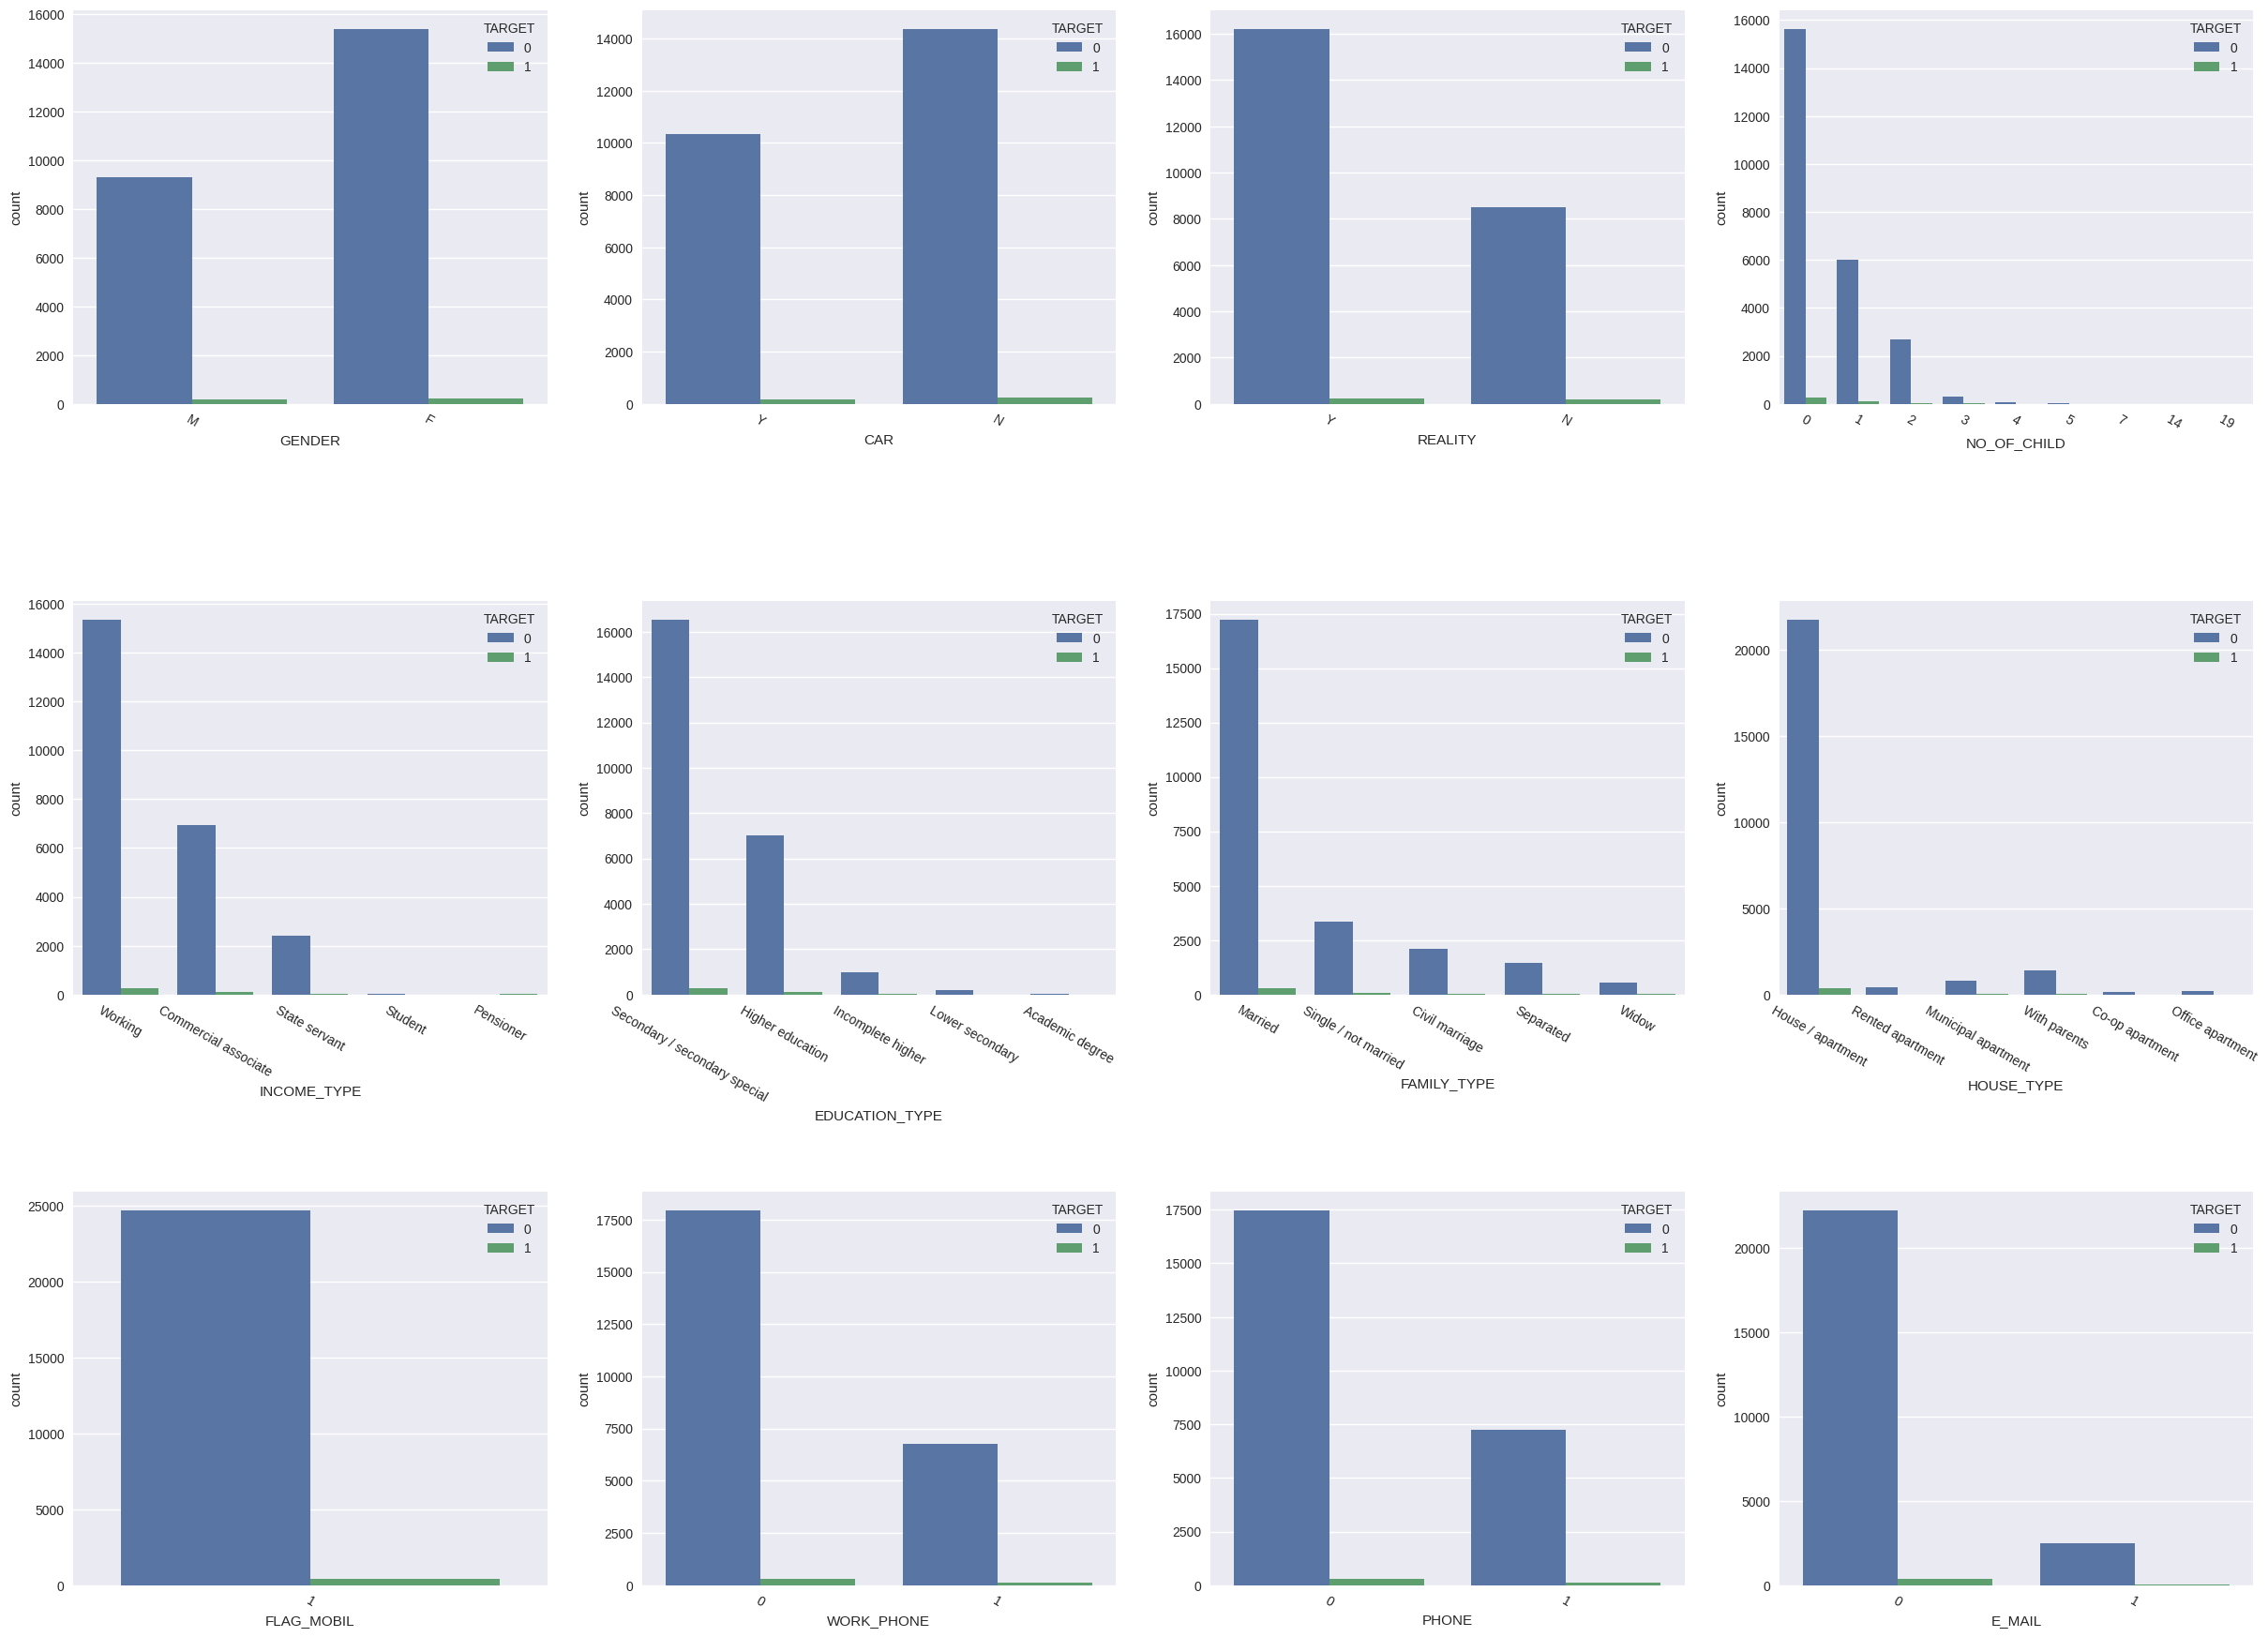

In [55]:
fig = plt.figure(figsize=(30, 30))
fig.subplots_adjust(wspace=0.2, hspace=0.5)

target = df['TARGET']

for i, col in enumerate(categorical_col):
    axes = plt.subplot(4, 4, i+1)
    sns.countplot(
        data=categorical_df, 
        x=col,
        hue=target,
        ax=axes
    )
    axes.tick_params(axis='x', labelrotation=-30)
    
plt.show()

We check the unique value of our `categorical_df`:

In [56]:
for col in categorical_col:
    print(f'{col}: {df[col].unique()}\n')

GENDER: ['M' 'F']

CAR: ['Y' 'N']

REALITY: ['Y' 'N']

NO_OF_CHILD: [0 3 1 2 4 14 5 19 7]

INCOME_TYPE: ['Working' 'Commercial associate' 'State servant' 'Student' 'Pensioner']

EDUCATION_TYPE: ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

FAMILY_TYPE: ['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow']

HOUSE_TYPE: ['House / apartment' 'Rented apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']

FLAG_MOBIL: [1]

WORK_PHONE: [0 1]

PHONE: [0 1]

E_MAIL: [0 1]



Now we look the column `'FLAG_MOBIL'`, this column just only have 1 unique value, but the counter plot show that it make 2 targets.

That is the reason why we can make sure that this column is misleading, so we need to drop it.

In [57]:
df = df.drop(columns=['ID', 'FLAG_MOBIL'])

In [58]:
numerical_df = numerical_df.drop(columns='ID')

In [59]:
categorical_df = categorical_df.drop(columns='FLAG_MOBIL')

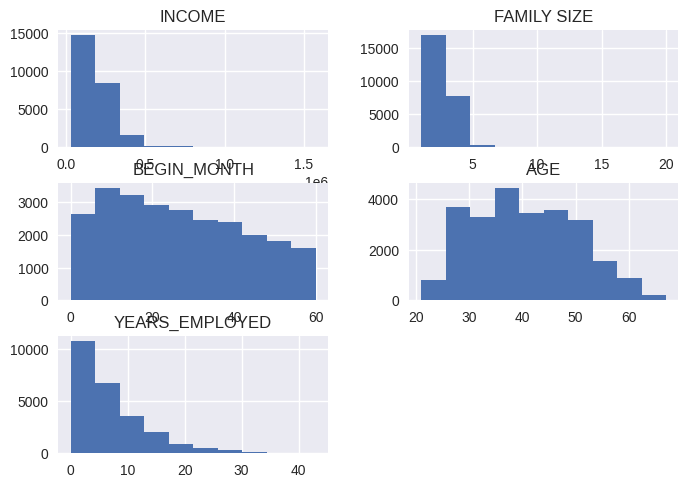

In [60]:
_ = numerical_df.hist()

The distribution of numerical_df are seem to Gaussian.

## 3. Data Preprocessing

In [61]:
df.head(3)

,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,2.0,29,59,3,0
1,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,1.0,4,52,8,0
2,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,1.0,26,52,8,0


### 3.1. Normalize data

In [63]:
from sklearn.preprocessing import StandardScaler

In [66]:
df = df.drop(columns='TARGET')
df.shape

(25134, 16)

In [67]:
df.

,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED
0,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,2.0,29,59,3
1,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,1.0,4,52,8
2,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,1.0,26,52,8
